In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import sys

In [2]:
x,y  = make_blobs(n_samples = 500, centers = 5,random_state=3)

In [3]:
print(x.shape,y.shape)

(500, 2) (500,)


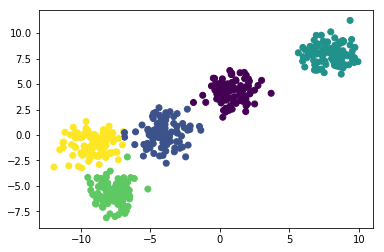

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
def closest(qp,centers):
    clos = 0
    clos_dist = sys.maxsize
    distance = np.zeros((centers.shape[0]))
    for ix in range(centers.shape[0]):
        temp = np.sqrt(np.sum((centers[ix]-qp)**2))
        distance[ix] = temp
        if(clos_dist>temp):
            clos = ix
            clos_dist = temp
#     print(clos,distance)
    return clos


def KMeans(x,n_centers,color):
    
    centers_idx = np.random.randint(0,x.shape[0],(n_centers))
    centers = np.zeros((n_centers,x.shape[1]))
    
    for ix in range(n_centers):
        centers[ix] = x[centers_idx[ix]]
        
#     print(centers.shape,centers)
       
    for mx in range(10):
        points_centers = {}
        npoints = np.zeros((n_centers))
        center_map = []
        for ix in range(n_centers):
            points_centers[ix] = []
    
        for ix in x:
            clos_cent = closest(ix,centers)
            center_map.append(color[clos_cent])
            points_centers[clos_cent].append(ix)
            npoints[clos_cent]+=1
        
        for ix in range(n_centers):
            points_centers[ix] = np.asarray(points_centers[ix])
            if(npoints[ix]==0):
                points_centers[ix] = 10*(2*np.random.randint(-5,5,(1,x.shape[1]))-1)
            else:
                centers[ix] = np.mean(points_centers[ix],axis=0)
#             print(points_centers[ix].shape)
#             print(centers[ix].shape)
        center_map = np.array(center_map)
        plt.scatter(x[:,0],x[:,1],c=center_map)
        plt.scatter(centers[:,0],centers[:,1],c = 'black',marker = '*')
        plt.show()
       
    return centers

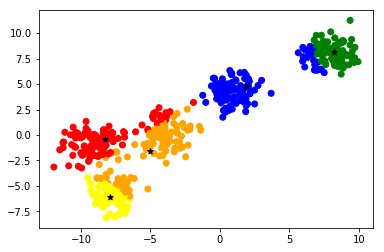

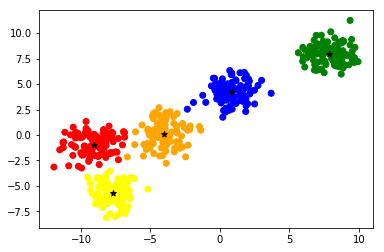

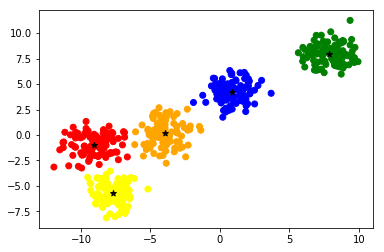

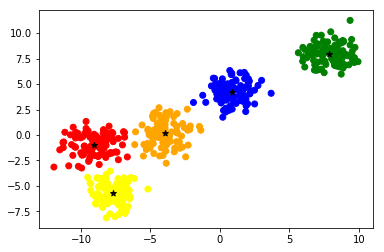

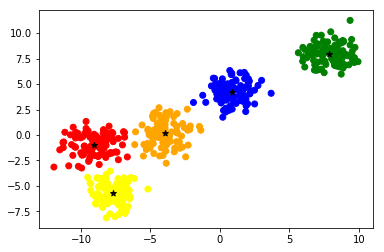

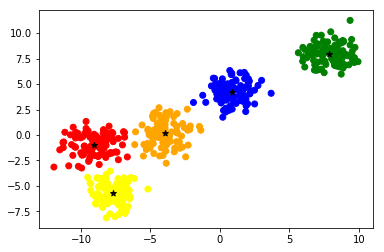

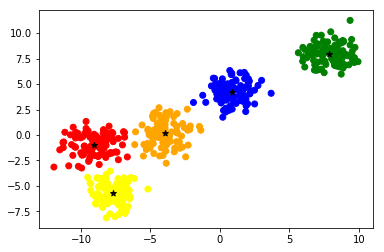

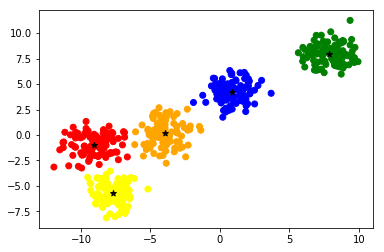

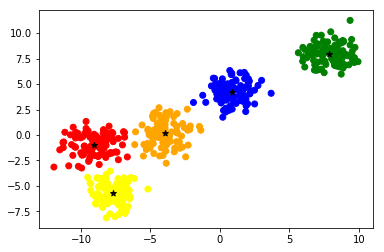

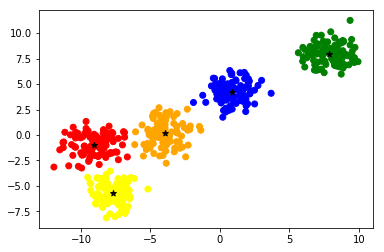

In [6]:
color = {0: 'red',1:'yellow',2:'green',3:'blue',4:'orange'}
 
ce = KMeans(x,5,color)